In [17]:
import numpy as np
from scipy import optimize
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [18]:
global g
g=9.8

In [19]:
def S(x,t=0.,m=0,xini=0.,xend=0.):
    t=float(t)
    Dt=t/x[:-1].size
    x=np.asarray(x)
    x[0]=xini
    x[-1]=xend
    return ((0.5*m*(x[1:]-x[:-1])**2/Dt**2-0.5*m*g*(x[1:]+x[:-1]))*Dt).sum()


In [20]:
def xfit(n,t=0,m=0,xini=0.,xend=0.,ftol=1E-8):
    t=float(t)
    if n%2==0:
        print ('x array must be odd')
        sys.exit()
  
    x0=np.zeros(n)
    a=optimize.fmin_powell(S,x0,args=(t,m,xini,xend),ftol=ftol,full_output=1)
    x=a[0]
    x[0]=xini;x[-1]=xend
    xmax=np.sort(x)[-1]
    Smin=a[1]
    Dt=t/x[:-1].size
    return x,xmax,Smin,Dt

In [21]:
#Definiendo parámetros
m=0.2 #Masa
t=4.0 #Tiempo
n=15 #Número de puntos

In [22]:
#Minimizando la acción
y=xfit(n,t,m,ftol=1E-16)

Optimization terminated successfully.
         Current function value: -50.960000
         Iterations: 20
         Function evaluations: 3724


In [23]:
#Ahora pues, hallamos el polinomio que describe el movimiento
t=np.linspace(0,4,n)
P=np.polyfit(t,y[0],deg=2)
pol=np.poly1d(P)
print(pol)

      2
-4.9 x + 19.6 x + 6.413e-08


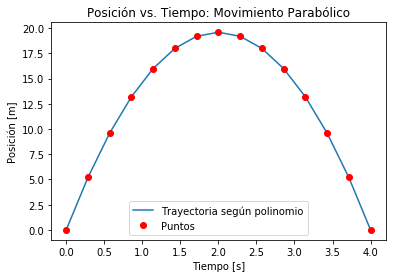

In [29]:
plt.plot(t,pol(t),label="Trayectoria según polinomio")
plt.ylabel("Posición [m]")
plt.xlabel("Tiempo [s]")
plt.title("Posición vs. Tiempo: Movimiento Parabólico")

plot(t,y[0],'ro',label="Puntos")
plt.legend()

